# 📊 EDA on Online Course Recommendation Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [2]:
# Load the dataset
df = pd.read_excel("online_course_recommendation_v2.xlsx")

# Display first few rows
df.head()


,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5


In [3]:
# Shape, info, and summary
print("Shape of dataset:", df.shape)
df.info()
df.describe(include='all')


Shape of dataset: (100000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_name               100000 non-null  object 
 3   instructor                100000 non-null  object 
 4   course_duration_hours     100000 non-null  float64
 5   certification_offered     100000 non-null  object 
 6   difficulty_level          100000 non-null  object 
 7   rating                    100000 non-null  float64
 8   enrollment_numbers        100000 non-null  int64  
 9   course_price              100000 non-null  float64
 10  feedback_score            100000 non-null  float64
 11  study_material_available  100000 non-null  object 
 12  time_spent_hours          100000 non-null  float64
 13  previous_cours

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
count,100000.000000,100000.000000,100000,100000,100000.00000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000
unique,NaN,NaN,20,20,NaN,2,3,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,Networking and System Administration,Jessica Martinez,NaN,Yes,Beginner,NaN,NaN,NaN,NaN,Yes,NaN,NaN
freq,NaN,NaN,5107,5092,NaN,70059,49877,NaN,NaN,NaN,NaN,85147,NaN,NaN
mean,24935.663570,5006.863560,NaN,NaN,52.38354,NaN,NaN,3.959859,25052.822850,261.073369,0.746865,NaN,20.691054,4.992670
std,14406.960108,2882.085456,NaN,NaN,27.42347,NaN,NaN,0.729958,14388.188356,139.013758,0.143683,NaN,13.669148,2.237259
min,1.000000,1.000000,NaN,NaN,5.00000,NaN,NaN,1.000000,50.000000,20.000000,0.092000,NaN,1.000000,0.000000
25%,12487.750000,2523.000000,NaN,NaN,28.60000,NaN,NaN,3.500000,12583.750000,140.100000,0.649000,NaN,9.900000,3.000000
50%,24793.500000,5012.000000,NaN,NaN,52.40000,NaN,NaN,4.000000,25057.500000,262.310000,0.750000,NaN,19.920000,5.000000
75%,37382.250000,7502.000000,NaN,NaN,76.10000,NaN,NaN,4.500000,37522.000000,381.702500,0.851000,NaN,30.080000,6.000000


In [4]:
# Missing values
df.isnull().sum()[df.isnull().sum() > 0]


Series([], dtype: int64)

In [5]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include='object').columns

print("Numerical Columns:", list(numerical_cols))
print("Categorical Columns:", list(categorical_cols))


Numerical Columns: ['user_id', 'course_id', 'course_duration_hours', 'rating', 'enrollment_numbers', 'course_price', 'feedback_score', 'time_spent_hours', 'previous_courses_taken']
Categorical Columns: ['course_name', 'instructor', 'certification_offered', 'difficulty_level', 'study_material_available']


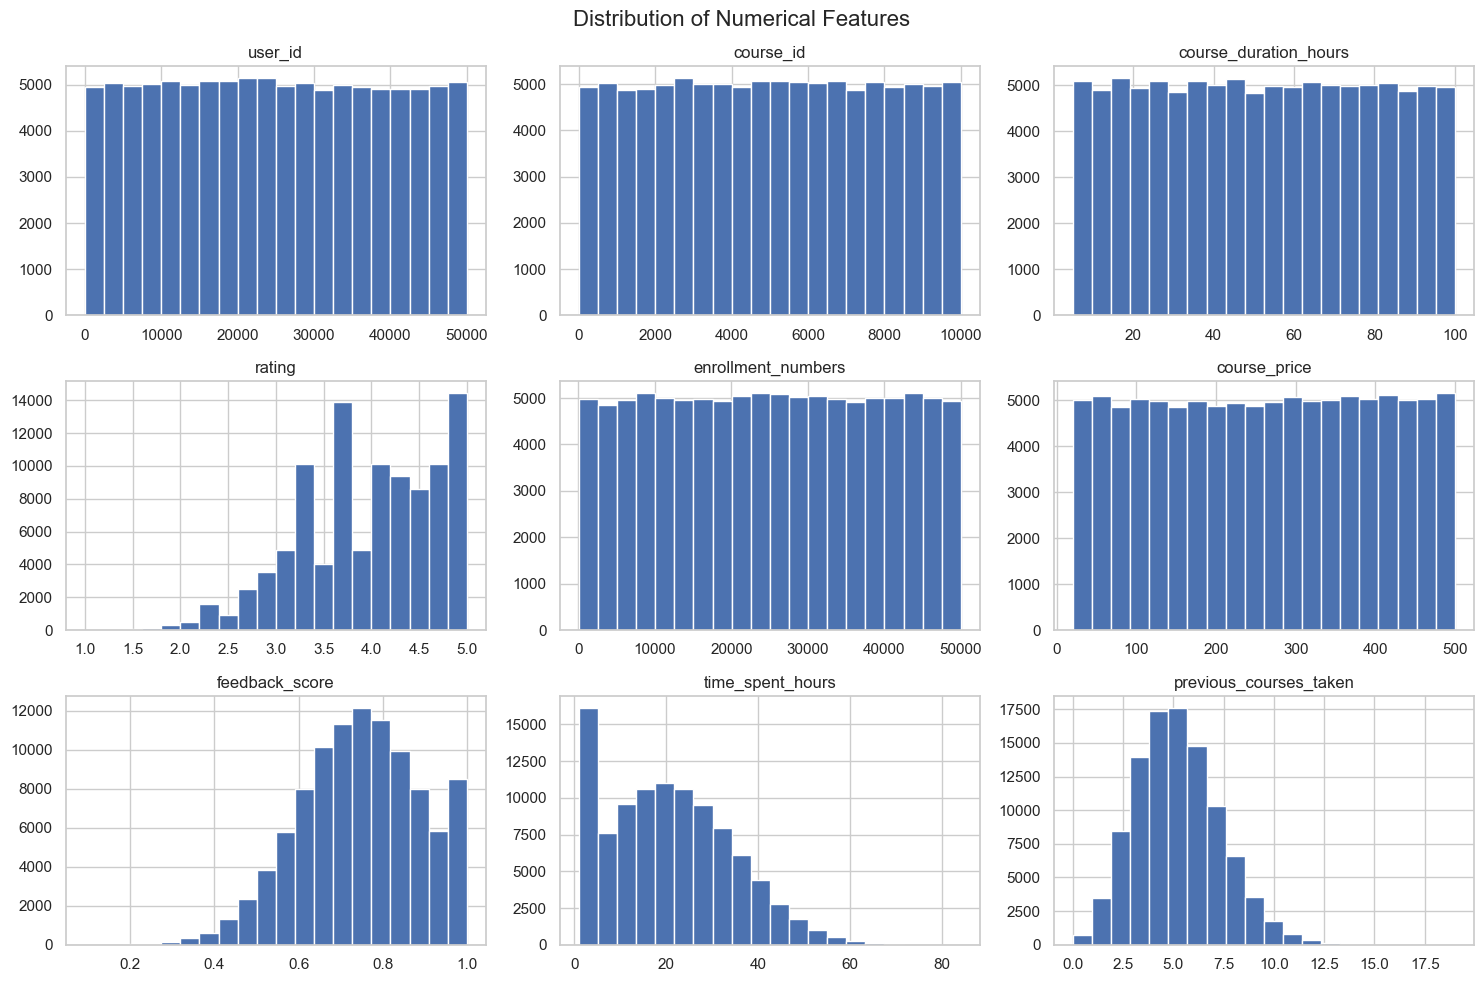

In [6]:
# Distribution of numerical features
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


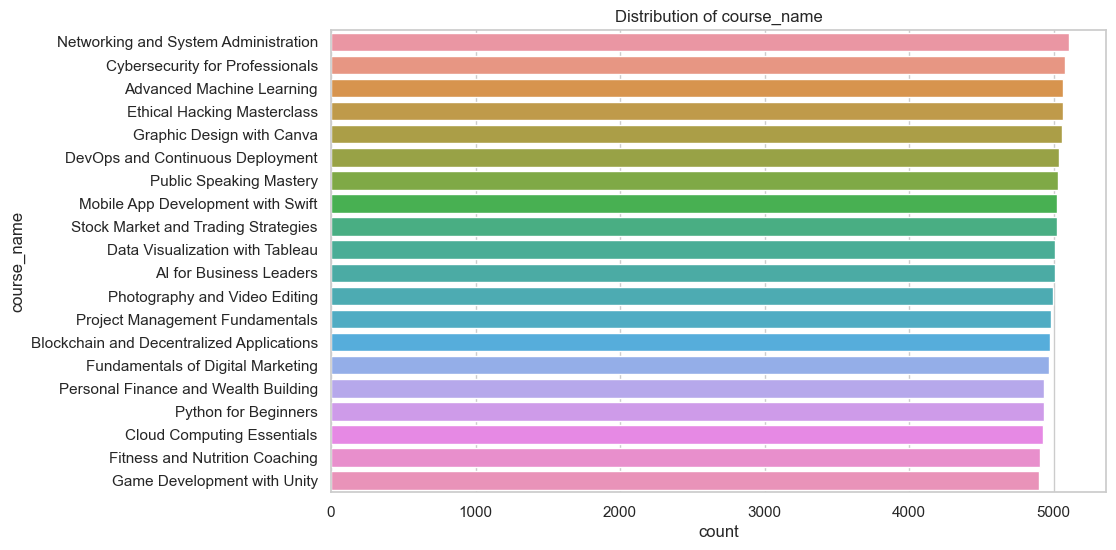

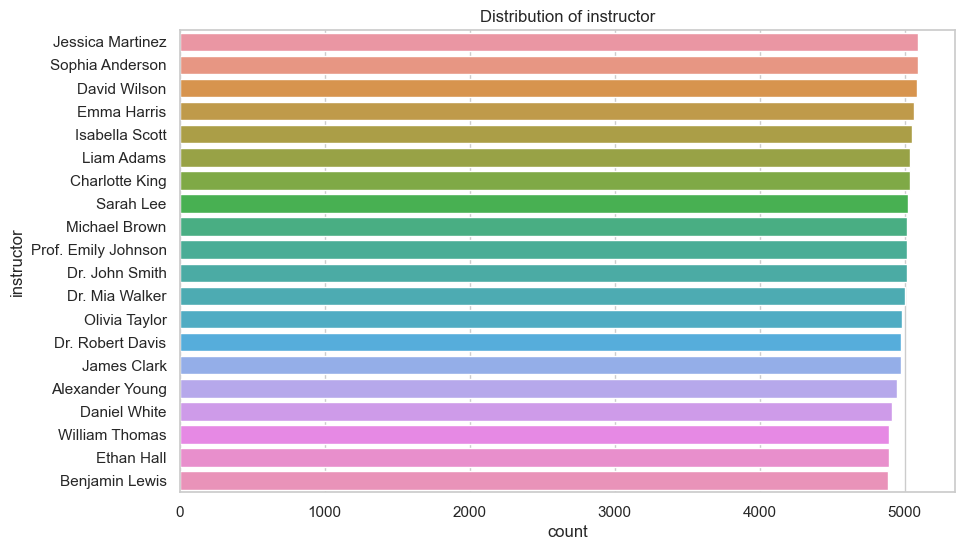

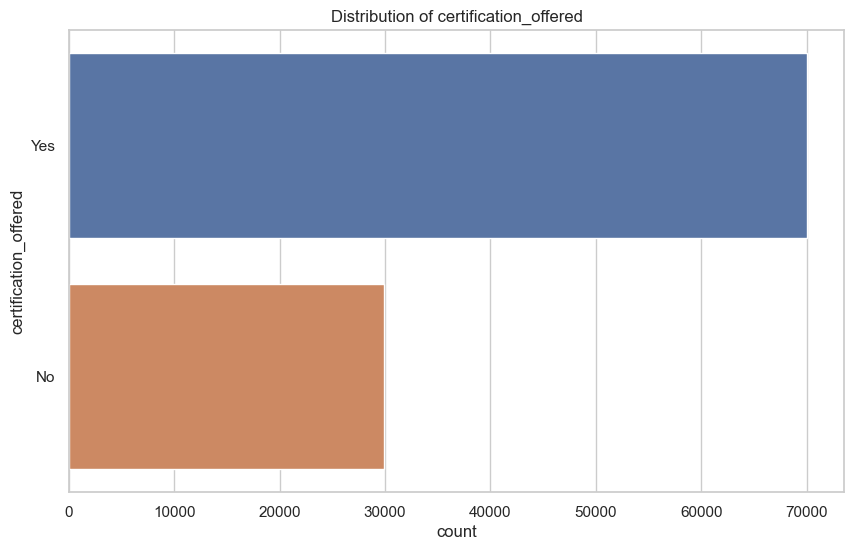

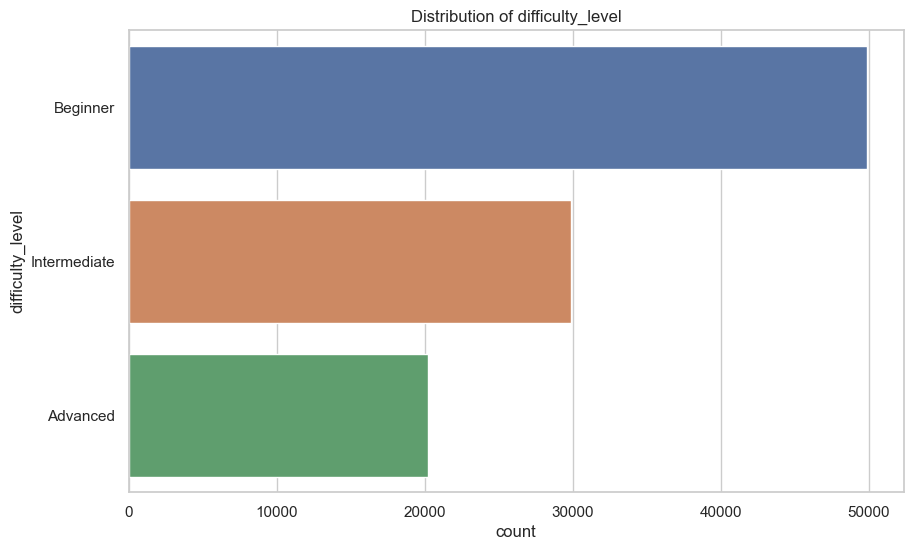

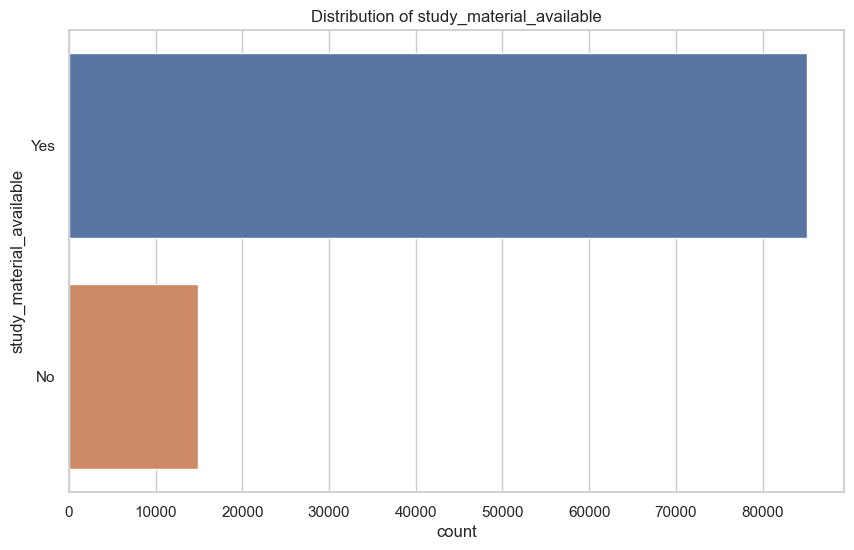

In [7]:
# Countplot for top 5 categorical columns
for col in categorical_cols[:5]:
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()


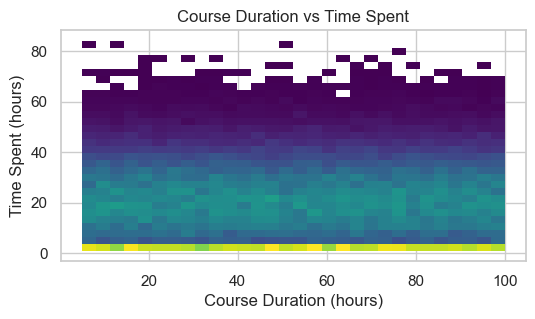

In [8]:
# Course Duration vs Time Spent using hist plot

import matplotlib.pyplot as plt
if 'course_duration_hours' in df.columns and 'time_spent_hours' in df.columns:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x='course_duration_hours', y='time_spent_hours', bins=30, cmap='viridis')
    plt.title('Course Duration vs Time Spent')
    plt.xlabel('Course Duration (hours)')
    plt.ylabel('Time Spent (hours)')
    plt.grid(True)
    plt.show()
elif 'course_duration_hours' in df.columns:
    print("'time_spent_hours' column not found for the scatter plot. Plotting distribution of 'course_duration_hours'.")
    plt.figure(figsize=(6, 3))
    sns.histplot(df['course_duration_hours'], bins=30, kde=True)
    plt.title('Distribution of Course Duration')
    plt.xlabel('Course Duration (hours)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
elif 'time_spent_hours' in df.columns:
     print("'course_duration_hours' column not found for the scatter plot. Plotting distribution of 'time_spent_hours'.")
     plt.figure(figsize=(6, 3))
     sns.histplot(df['time_spent_hours'], bins=30, kde=True)
     plt.title('Distribution of Time Spent by Students')
     plt.xlabel('Time Spent (hours)')
     plt.ylabel('Frequency')
     plt.grid(True)
     plt.show()
else:
    print("Neither 'course_duration_hours' nor 'time_spent_hours' column found for this visualization.")


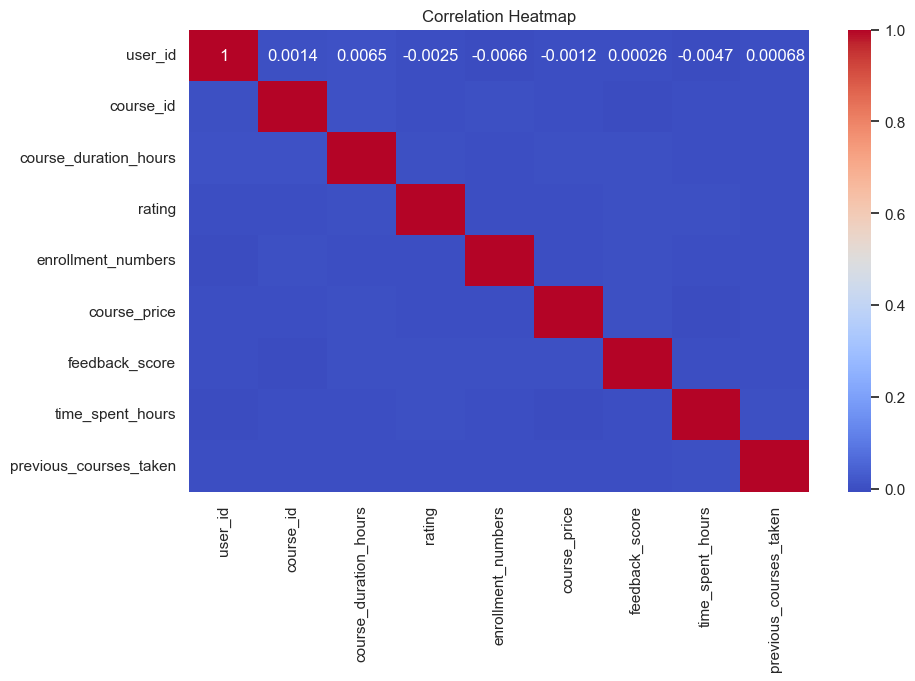

In [9]:
# Correlation heatmap
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



Average Rating by Certification Offered:
certification_offered
Yes    3.964274
No     3.949527
Name: rating, dtype: float64


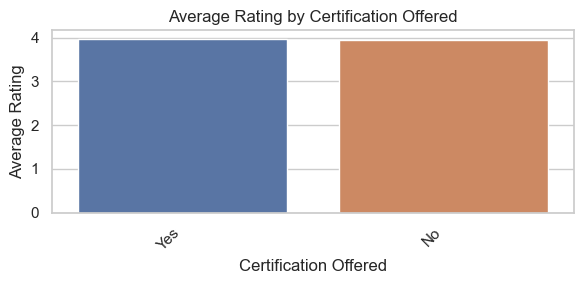

In [10]:
# Rating by Certification Offered

import matplotlib.pyplot as plt
rating_by_certification = df.groupby('certification_offered')['rating'].mean().sort_values(ascending=False)
print("\nAverage Rating by Certification Offered:")
print(rating_by_certification)
plt.figure(figsize=(6,3))
sns.barplot(x=rating_by_certification.index, y=rating_by_certification.values)
plt.title('Average Rating by Certification Offered')
plt.xlabel('Certification Offered')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

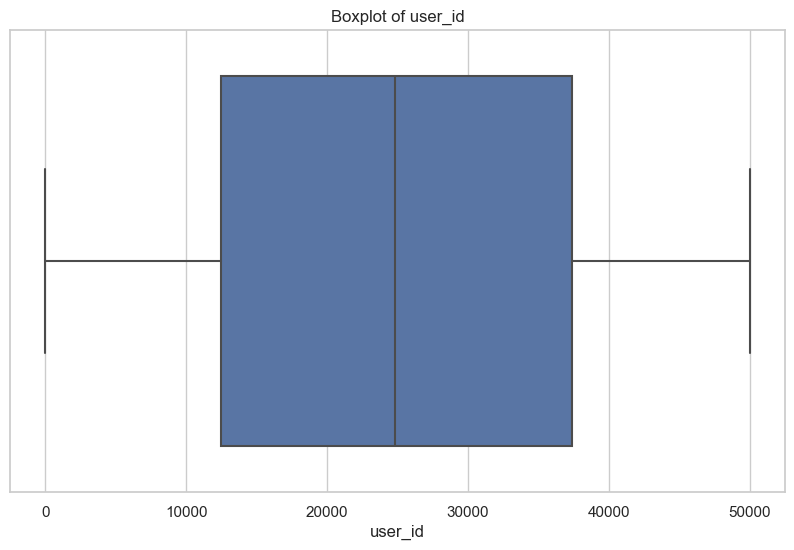

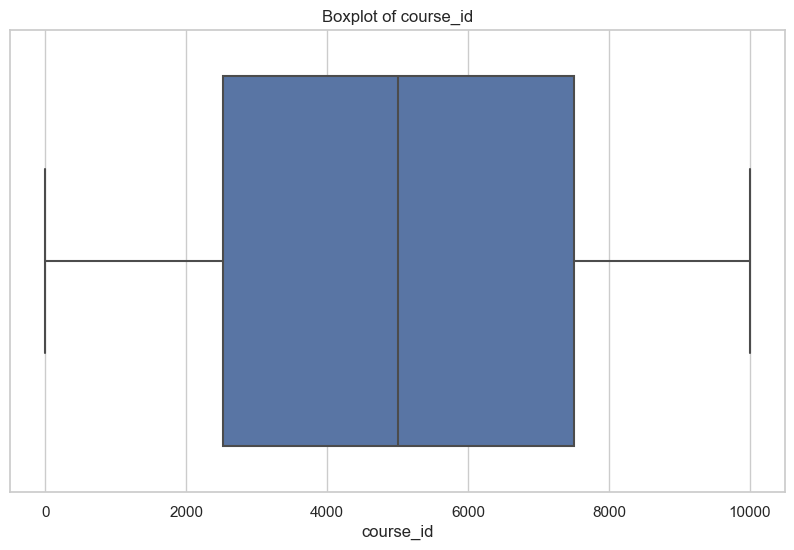

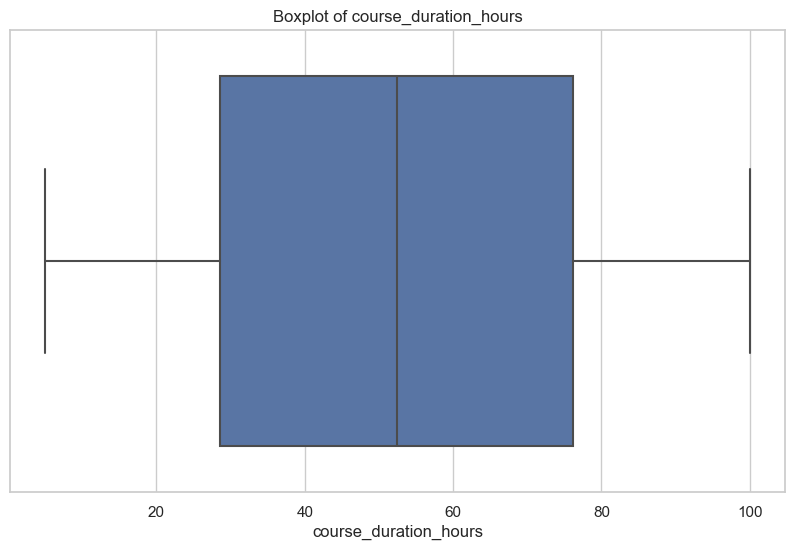

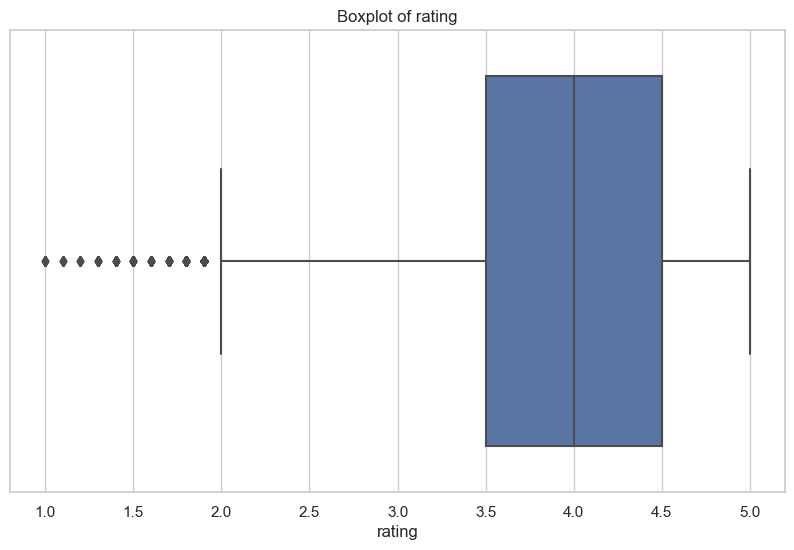

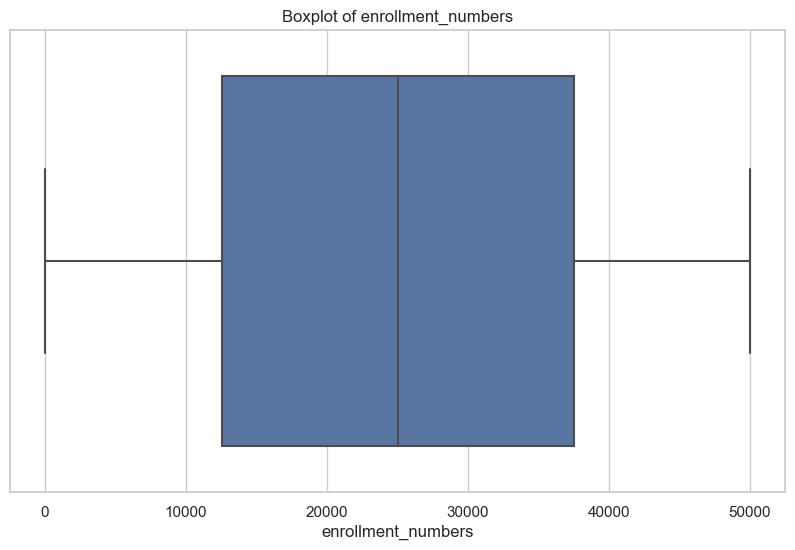

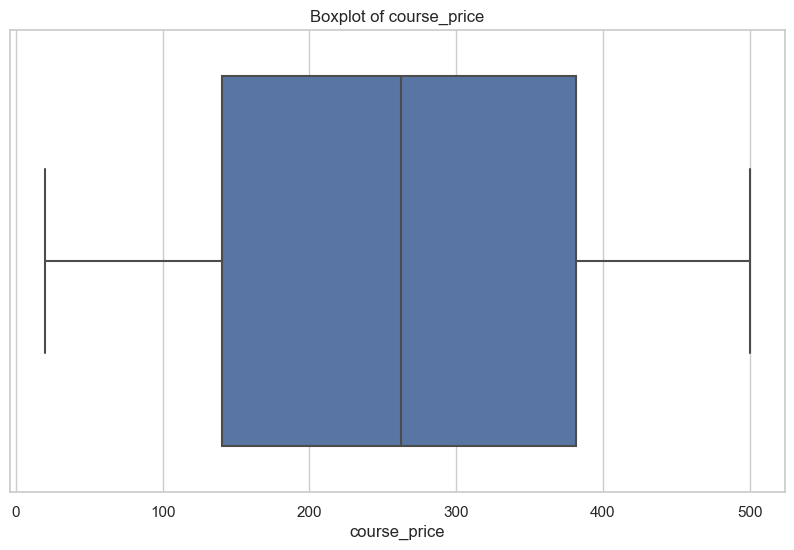

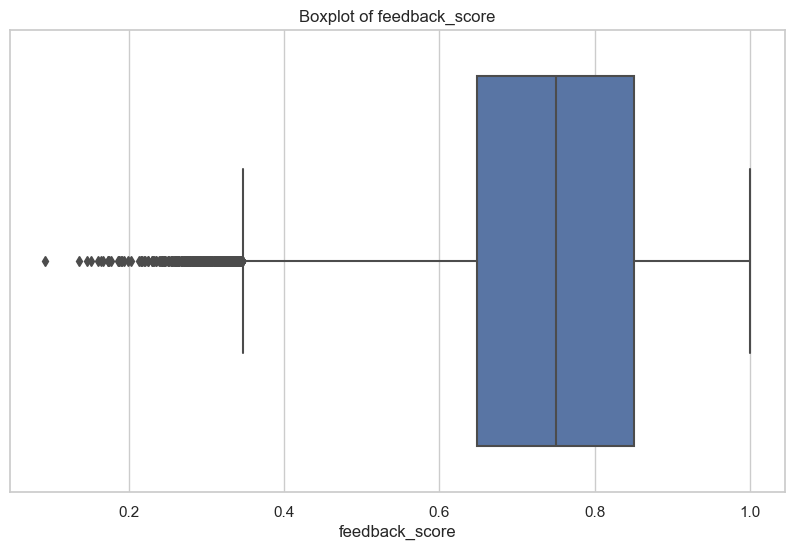

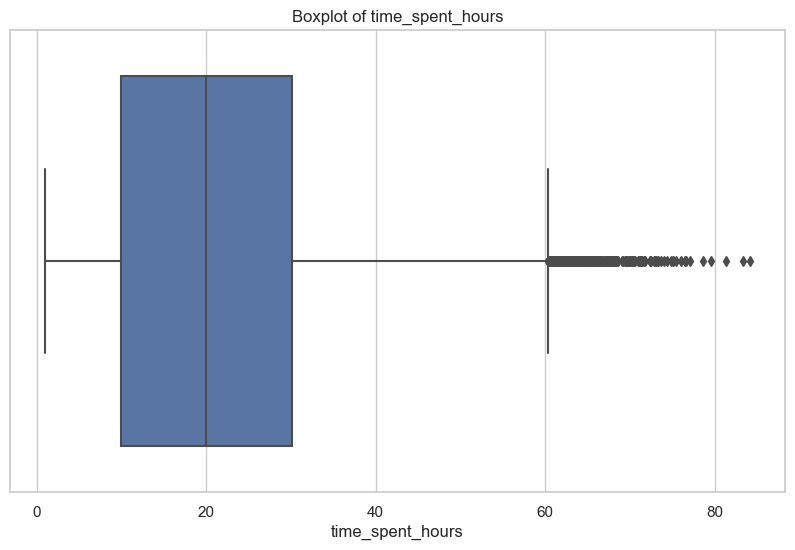

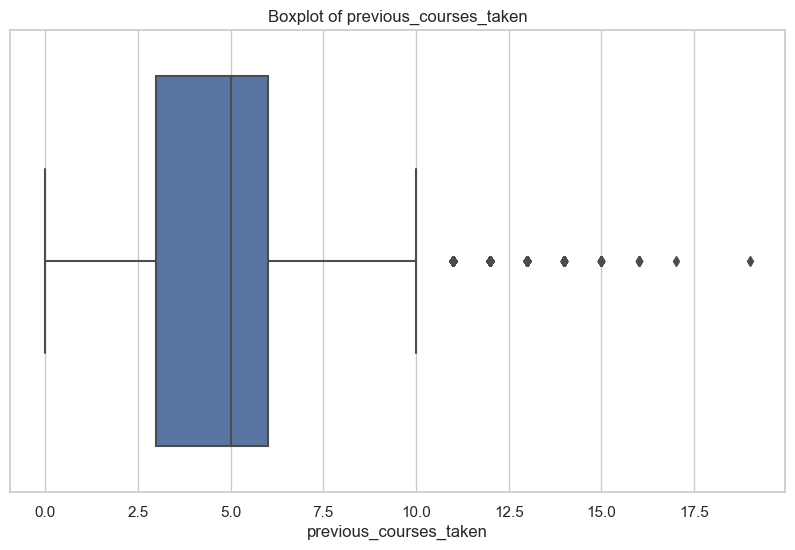

In [11]:
# Boxplot for outlier detection
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


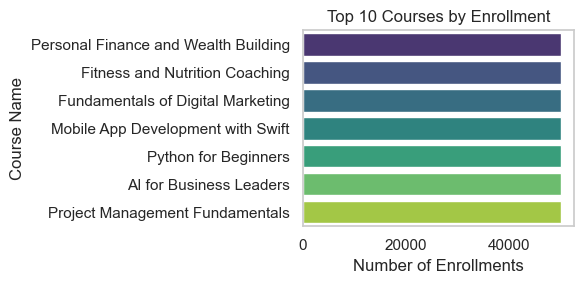

In [12]:
# Top 10 Courses by Enrollment
import matplotlib.pyplot as plt
if 'enrollment_numbers' in df.columns and 'course_name' in df.columns:
    top_10_courses = df.nlargest(10, 'enrollment_numbers')

    plt.figure(figsize=(6,3))
    sns.barplot(x='enrollment_numbers', y='course_name', data=top_10_courses, palette='viridis')
    plt.title('Top 10 Courses by Enrollment')
    plt.xlabel('Number of Enrollments')
    plt.ylabel('Course Name')
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns ('enrollment_numbers', 'course_name') not found for Top 10 Courses visualization.")

### 🔍 Key Insights:
- Most courses fall into beginner and intermediate levels.
- Some difficulty levels may have higher average ratings.
- Categories like Data Science or Programming often dominate.
- Time trend can show if more courses are being added each year.



### Online Course Recommendation System 
 ## 1. Content-Based Filtering (Keyword + Attribute Matching)
How it works:
1. It will take Input from user as Area of Interset  and difficulty level 
2. Matches content: Searches course names (or descriptions) for that keyword
3. Ranks courses: Using attributes like rating, feedback_score, and enrollment_numbers
4. Filters: Based on difficulty level (Beginner, Intermediate, Advanced)

This is a rule-based, heuristic filtering system, not machine learning.

In [24]:
import pandas as pd

# Load dataset
df = pd.read_excel("online_course_recommendation_v2.xlsx")

while True:
    # Step 1: Ask user for keyword
    keyword = input("\n🔍 Enter your area of interest (e.g., 'python', 'AI', 'data'): ").lower()

    # Filter courses by keyword in course name
    filtered = df[df['course_name'].str.lower().str.contains(keyword, na=False)]

    # Sort by rating, feedback score, and enrollments
    filtered = filtered.sort_values(
        by=['rating', 'feedback_score', 'enrollment_numbers'],
        ascending=False
    )

    # Step 2: Show top 10 courses
    top_10 = filtered.head(10)

    if top_10.empty:
        print("⚠️ No courses found for the given keyword. Please try a different keyword.")
    else:
        print("\n🎯 Top 10 Course Recommendations Based on Your Interest:\n")
        print(top_10[['course_name', 'instructor', 'difficulty_level', 'rating', 'feedback_score']])

        # Step 3: Ask for preferred difficulty level
        level = input("\n🎚️ Enter your preferred difficulty level (Beginner / Intermediate / Advanced): ").capitalize()

        # Filter top 10 based on difficulty level
        final = top_10[top_10['difficulty_level'] == level]

        if final.empty:
            print(f"\n⚠️ No courses found at {level} level in the top 10 results.")
        else:
            print(f"\n📘 Filtered Courses at {level} Level:\n")
            print(final[['course_name', 'instructor', 'difficulty_level', 'rating', 'feedback_score']])

    # Step 4: Ask if the user wants to search again
    repeat = input("\n🔁 Do you want to search again? (yes/no): ").lower()
    if repeat == 'no':
        print("\n👋 Thank you! Happy Learning!")
        break



🔍 Enter your area of interest (e.g., 'python', 'AI', 'data'):  no


⚠️ No courses found for the given keyword. Please try a different keyword.



🔁 Do you want to search again? (yes/no):  no



👋 Thank you! Happy Learning!


In [26]:
import pandas as pd

# Load dataset
df = pd.read_excel("online_course_recommendation_v2.xlsx")

while True:
    # Step 1: Ask user for keyword
    keyword = input("\n🔍 Enter your area of interest (e.g., 'python', 'AI', 'data'): ").lower()

    # Filter all courses by keyword in course_name
    matched_courses = df[df['course_name'].str.lower().str.contains(keyword, na=False)]

    if matched_courses.empty:
        print("⚠️ No courses found with that keyword. Please try again.")
    else:
        # Step 1 Output: Display ALL courses with that keyword
        print(f"\n📚 All Courses Containing '{keyword}' in Course Title:\n")
        print(matched_courses[['course_name', 'instructor', 'difficulty_level', 'rating', 'feedback_score']])

        # Step 2: Deduplicate on course name and rank top 10
        top_courses = (
            matched_courses
            .sort_values(by=['rating', 'feedback_score', 'enrollment_numbers'], ascending=False)
            .drop_duplicates(subset='course_name')
            .head(10)
        )

        print("\n🎯 Top 10 Unique Course Recommendations:\n")
        print(top_courses[['course_name', 'instructor', 'difficulty_level', 'rating', 'feedback_score']])

        # Step 3: Ask for preferred difficulty level
        level = input("\n🎚️ Enter your preferred difficulty level (Beginner / Intermediate / Advanced): ").capitalize()

        # Find full list (with all instructors) at chosen difficulty level for courses in top 10
        top_course_names = top_courses['course_name'].unique()
        filtered_by_level = matched_courses[
            (matched_courses['difficulty_level'] == level) &
            (matched_courses['course_name'].isin(top_course_names))
        ]

        if filtered_by_level.empty:
            print(f"\n⚠️ No {level} level courses found for keyword '{keyword}' in the top courses.")
        else:
            print(f"\n📘 {level} Level Courses with Multiple Instructors:\n")
            print(filtered_by_level[['course_name', 'instructor', 'difficulty_level', 'rating', 'feedback_score']])

    # Step 4: Ask to repeat
    repeat = input("\n🔁 Do you want to search again? (yes/no): ").lower()
    if repeat == 'no':
        print("\n👋 Thank you! Happy Learning!")
        break






🔍 Enter your area of interest (e.g., 'python', 'AI', 'data'):  Python



📚 All Courses Containing 'python' in Course Title:

                course_name      instructor difficulty_level  rating  \
0      Python for Beginners     Emma Harris         Beginner     5.0   
16     Python for Beginners  Charlotte King         Beginner     4.6   
89     Python for Beginners  Isabella Scott     Intermediate     2.7   
119    Python for Beginners     James Clark         Beginner     4.4   
125    Python for Beginners  Charlotte King         Advanced     4.4   
...                     ...             ...              ...     ...   
99943  Python for Beginners     James Clark         Beginner     4.4   
99948  Python for Beginners    Daniel White         Beginner     3.4   
99975  Python for Beginners  Isabella Scott         Beginner     5.0   
99980  Python for Beginners       Sarah Lee         Beginner     3.1   
99986  Python for Beginners  Dr. John Smith         Beginner     3.3   

       feedback_score  
0               0.797  
16              0.966  
89        


🎚️ Enter your preferred difficulty level (Beginner / Intermediate / Advanced):  Beginner



📘 Beginner Level Courses with Multiple Instructors:

                course_name       instructor difficulty_level  rating  \
0      Python for Beginners      Emma Harris         Beginner     5.0   
16     Python for Beginners   Charlotte King         Beginner     4.6   
119    Python for Beginners      James Clark         Beginner     4.4   
173    Python for Beginners  Sophia Anderson         Beginner     3.2   
292    Python for Beginners  Alexander Young         Beginner     3.9   
...                     ...              ...              ...     ...   
99943  Python for Beginners      James Clark         Beginner     4.4   
99948  Python for Beginners     Daniel White         Beginner     3.4   
99975  Python for Beginners   Isabella Scott         Beginner     5.0   
99980  Python for Beginners        Sarah Lee         Beginner     3.1   
99986  Python for Beginners   Dr. John Smith         Beginner     3.3   

       feedback_score  
0               0.797  
16              0.966


🔁 Do you want to search again? (yes/no):  yes

🔍 Enter your area of interest (e.g., 'python', 'AI', 'data'):  AI



📚 All Courses Containing 'ai' in Course Title:

                                     course_name           instructor  \
9      Blockchain and Decentralized Applications       Benjamin Lewis   
13     Blockchain and Decentralized Applications  Prof. Emily Johnson   
19     Blockchain and Decentralized Applications       Isabella Scott   
48     Blockchain and Decentralized Applications          Emma Harris   
52                       AI for Business Leaders      Alexander Young   
...                                          ...                  ...   
99959                    AI for Business Leaders      Alexander Young   
99969                    AI for Business Leaders           Liam Adams   
99974  Blockchain and Decentralized Applications     Dr. Robert Davis   
99978                    AI for Business Leaders     Jessica Martinez   
99981  Blockchain and Decentralized Applications       Charlotte King   

      difficulty_level  rating  feedback_score  
9         Intermediate   


🎚️ Enter your preferred difficulty level (Beginner / Intermediate / Advanced):  Beginner



📘 Beginner Level Courses with Multiple Instructors:

                                     course_name        instructor  \
48     Blockchain and Decentralized Applications       Emma Harris   
57                       AI for Business Leaders      Daniel White   
65     Blockchain and Decentralized Applications    Benjamin Lewis   
90                       AI for Business Leaders    Benjamin Lewis   
130    Blockchain and Decentralized Applications    Dr. John Smith   
...                                          ...               ...   
99957  Blockchain and Decentralized Applications  Dr. Robert Davis   
99958  Blockchain and Decentralized Applications         Sarah Lee   
99974  Blockchain and Decentralized Applications  Dr. Robert Davis   
99978                    AI for Business Leaders  Jessica Martinez   
99981  Blockchain and Decentralized Applications    Charlotte King   

      difficulty_level  rating  feedback_score  
48            Beginner     4.5           0.647  
57     


🔁 Do you want to search again? (yes/no):  no



👋 Thank you! Happy Learning!


### 2. Content-Based Recommendation System using Cosine Similarity
1. TF-IDF (text vectorization) + cosine similarity on the course_name and  course_description) to recommend courses based on our interest keyword.

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_excel("online_course_recommendation_v2.xlsx")
df['course_name'] = df['course_name'].fillna("")

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['course_name'])

# Loop for repeated recommendation
while True:
    # Step 1: User input for interest
    user_input = input("\n🔍 Enter your interest keyword (e.g., Python, AI, Data): ").lower()

    # Step 2: Convert user input into TF-IDF vector
    user_vec = vectorizer.transform([user_input])
    cos_sim = cosine_similarity(user_vec, tfidf_matrix).flatten()

    # Step 3: Get top N course names (no duplicates)
    df['cos_sim'] = cos_sim
    top_unique_courses = (
        df.sort_values(by='cos_sim', ascending=False)
          .drop_duplicates(subset='course_name')
          .head(10)
    )

    if top_unique_courses.empty:
        print("⚠️ No matching courses found.")
    else:
        print("\n🎯 Top 10 Recommended Courses Based on Your Interest (No duplicates):\n")
        print(top_unique_courses[['course_name', 'instructor', 'difficulty_level', 'rating', 'feedback_score']])

        # Step 4: Ask for difficulty level
        level = input("\n🎚️ Enter your preferred difficulty level (Beginner / Intermediate / Advanced): ").capitalize()

        # Get the course names from top results
        top_course_names = top_unique_courses['course_name'].tolist()

        # Step 5: From original df, get all rows with matching course_name + selected level
        full_results = df[
            (df['course_name'].isin(top_course_names)) &
            (df['difficulty_level'] == level_]()




🔍 Enter your interest keyword (e.g., Python, AI, Data):  Python



🎯 Top 10 Recommended Courses Based on Your Interest (No duplicates):

                                     course_name           instructor  \
0                           Python for Beginners          Emma Harris   
98565              Photography and Video Editing        Olivia Taylor   
66002            Cybersecurity for Professionals  Prof. Emily Johnson   
66003                Game Development with Unity          Emma Harris   
66347            Data Visualization with Tableau            Sarah Lee   
66348             Fitness and Nutrition Coaching           Ethan Hall   
66004                  Advanced Machine Learning       Isabella Scott   
66005  Blockchain and Decentralized Applications      Alexander Young   
66006                  Graphic Design with Canva           Ethan Hall   
66362       Networking and System Administration       Isabella Scott   

      difficulty_level  rating  feedback_score  
0             Beginner     5.0           0.797  
98565         Beginner     


🎚️ Enter your preferred difficulty level (Beginner / Intermediate / Advanced):  Advanced



📘 All 'Advanced' Level Versions of Recommended Courses (Different Instructors):

                                     course_name        instructor  \
22468       Networking and System Administration    William Thomas   
39660            Data Visualization with Tableau    Benjamin Lewis   
78774             Fitness and Nutrition Coaching    Isabella Scott   
17889            Cybersecurity for Professionals     Olivia Taylor   
39672                  Graphic Design with Canva     Michael Brown   
...                                          ...               ...   
56392       Networking and System Administration      Daniel White   
54391  Blockchain and Decentralized Applications  Dr. Robert Davis   
62423  Blockchain and Decentralized Applications    Benjamin Lewis   
46899             Fitness and Nutrition Coaching      David Wilson   
53017                       Python for Beginners     Michael Brown   

      difficulty_level  rating  feedback_score  
22468         Advanced     5


🔁 Do you want to search again? (yes/no):  no



👋 Thank you for using the Course Recommender!


### 3. content-based filtering with TF-IDF + cosine similarity 

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_excel("online_course_recommendation_v2.xlsx")
df['course_name'] = df['course_name'].fillna("")

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['course_name'])

# Loop for repeated recommendation
while True:
    # Step 1: User input for interest
    user_input = input("\n🔍 Enter your interest keyword (e.g., Python, AI, Data): ").lower()

    # Step 2: Convert user input into TF-IDF vector
    user_vec = vectorizer.transform([user_input])
    cos_sim = cosine_similarity(user_vec, tfidf_matrix).flatten()

    # Step 3: Get top N course names (no duplicates)
    df['cos_sim'] = cos_sim
    top_unique_courses = (
        df.sort_values(by='cos_sim', ascending=False)
          .drop_duplicates(subset='course_name')
          .head(10)
    )

    if top_unique_courses.empty:
        print("⚠️ No matching courses found.")
    else:
        print("\n🎯 Top 10 Recommended Courses Based on Your Interest (No duplicates):\n")
        print(top_unique_courses[['course_name', 'instructor', 'difficulty_level', 'rating', 'feedback_score']])

        # Step 4: Ask for difficulty level
        level = input("\n🎚️ Enter your preferred difficulty level (Beginner / Intermediate / Advanced): ").capitalize()

        # Get the course names from top results
        top_course_names = top_unique_courses['course_name'].tolist()

        # Step 5: From original df, get all rows with matching course_name + selected level
        full_results = df[
            (df['course_name'].isin(top_course_names)) &
            (df['difficulty_level'] == level)
        ].sort_values(by='rating', ascending=False)

        if full_results.empty:
            print(f"\n⚠️ No {level} level courses found for these topics.")
        else:
            print(f"\n📘 All '{level}' Level Versions of Recommended Courses (Different Instructors):\n")
            print(full_results[['course_name', 'instructor', 'difficulty_level', 'rating', 'feedback_score']])

            # ✅ Step 6: Show Top 5 Final Recommendations by Rating
            top_5 = full_results.head(5)
            print(f"\n🏆 Top 5 Highest Rated '{level}' Level Courses:\n")
            print(top_5[['course_name', 'instructor', 'rating', 'feedback_score']])

    # Step 7: Ask user whether to continue
    again = input("\n🔁 Do you want to search again? (yes/no): ").lower()
    if again == 'no':
        print("\n👋 Thank you for using the Course Recommender!")
        break



🔍 Enter your interest keyword (e.g., Python, AI, Data):  Python



🎯 Top 10 Recommended Courses Based on Your Interest (No duplicates):

                                     course_name           instructor  \
0                           Python for Beginners          Emma Harris   
98565              Photography and Video Editing        Olivia Taylor   
66002            Cybersecurity for Professionals  Prof. Emily Johnson   
66003                Game Development with Unity          Emma Harris   
66347            Data Visualization with Tableau            Sarah Lee   
66348             Fitness and Nutrition Coaching           Ethan Hall   
66004                  Advanced Machine Learning       Isabella Scott   
66005  Blockchain and Decentralized Applications      Alexander Young   
66006                  Graphic Design with Canva           Ethan Hall   
66362       Networking and System Administration       Isabella Scott   

      difficulty_level  rating  feedback_score  
0             Beginner     5.0           0.797  
98565         Beginner     


🎚️ Enter your preferred difficulty level (Beginner / Intermediate / Advanced):  Beginner



📘 All 'Beginner' Level Versions of Recommended Courses (Different Instructors):

                                     course_name        instructor  \
0                           Python for Beginners       Emma Harris   
57650              Photography and Video Editing       Emma Harris   
57518  Blockchain and Decentralized Applications  Jessica Martinez   
13666                  Graphic Design with Canva       James Clark   
57492  Blockchain and Decentralized Applications    Benjamin Lewis   
...                                          ...               ...   
56514  Blockchain and Decentralized Applications         Sarah Lee   
71424            Cybersecurity for Professionals        Liam Adams   
5739             Cybersecurity for Professionals        Liam Adams   
24948                  Graphic Design with Canva      Daniel White   
36339              Photography and Video Editing      David Wilson   

      difficulty_level  rating  feedback_score  
0             Beginner     5


🔁 Do you want to search again? (yes/no):  no



👋 Thank you for using the Course Recommender!


In [35]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_excel("online_course_recommendation_v2.xlsx")
df['course_name'] = df['course_name'].fillna("")

# Start loop for repeated recommendations
while True:
    # Step 1: Get user interest
    user_input = input("\n🔍 Enter your interest keyword (e.g., Python, AI, Data): ").lower()

    # Step 1.5: Filter courses that contain the keyword in their name
    filtered_df = df[df['course_name'].str.lower().str.contains(user_input)]

    if filtered_df.empty:
        print("⚠️ No courses found that contain that keyword in the course name.")
    else:
        # Step 2: TF-IDF on filtered data
        vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = vectorizer.fit_transform(filtered_df['course_name'])
        user_vec = vectorizer.transform([user_input])
        cos_sim = cosine_similarity(user_vec, tfidf_matrix).flatten()

        # Step 3: Rank by cosine similarity and remove duplicate course names
        filtered_df = filtered_df.copy()
        filtered_df['cos_sim'] = cos_sim

        top_unique_courses = (
            filtered_df.sort_values(by='cos_sim', ascending=False)
                       .drop_duplicates(subset='course_name')
                       .head(10)
        )

        print("\n🎯 Top 10 Recommended Courses (No duplicate names, contain keyword):\n")
        print(top_unique_courses[['course_name', 'instructor', 'difficulty_level', 'rating', 'feedback_score']])

        # Step 4: Ask for difficulty level
        level = input("\n🎚️ Enter your preferred difficulty level (Beginner / Intermediate / Advanced): ").capitalize()

        top_course_names = top_unique_courses['course_name'].tolist()

        full_results = df[
            (df['course_name'].isin(top_course_names)) &
            (df['difficulty_level'] == level)
        ].sort_values(by='rating', ascending=False)

        if full_results.empty:
            print(f"\n⚠️ No '{level}' level courses found for the selected titles.")
        else:
            print(f"\n📘 All '{level}' Level Versions of Selected Courses (Different Instructors):\n")
            print(full_results[['course_name', 'instructor', 'difficulty_level', 'rating', 'feedback_score']])

            # Step 5: Show top 5 highest-rated among them
            top5 = full_results.head(5)
            print(f"\n🏆 Top 5 Highest Rated '{level}' Level Courses:\n")
            print(top5[['course_name', 'instructor', 'rating', 'feedback_score']])

    # Step 6: Ask to continue
    again = input("\n🔁 Do you want to search again? (yes/no): ").lower()
    if again == 'no':
        print("\n👋 Thank you for using the Course Recommender!")
        break




🔍 Enter your interest keyword (e.g., Python, AI, Data):  Python



🎯 Top 10 Recommended Courses (No duplicate names, contain keyword):

            course_name   instructor difficulty_level  rating  feedback_score
0  Python for Beginners  Emma Harris         Beginner     5.0           0.797



🎚️ Enter your preferred difficulty level (Beginner / Intermediate / Advanced):  Beginner



📘 All 'Beginner' Level Versions of Selected Courses (Different Instructors):

                course_name        instructor difficulty_level  rating  \
0      Python for Beginners       Emma Harris         Beginner     5.0   
38717  Python for Beginners       James Clark         Beginner     5.0   
42565  Python for Beginners  Jessica Martinez         Beginner     5.0   
42562  Python for Beginners    Dr. John Smith         Beginner     5.0   
41937  Python for Beginners    William Thomas         Beginner     5.0   
...                     ...               ...              ...     ...   
13611  Python for Beginners    Benjamin Lewis         Beginner     1.7   
50379  Python for Beginners    Dr. John Smith         Beginner     1.6   
76113  Python for Beginners        Liam Adams         Beginner     1.6   
83881  Python for Beginners    William Thomas         Beginner     1.5   
15665  Python for Beginners     Michael Brown         Beginner     1.3   

       feedback_score  
0       


🔁 Do you want to search again? (yes/no):  yes

🔍 Enter your interest keyword (e.g., Python, AI, Data):  AI



🎯 Top 10 Recommended Courses (No duplicate names, contain keyword):

                                     course_name           instructor  \
50007                    AI for Business Leaders  Prof. Emily Johnson   
85561  Blockchain and Decentralized Applications           Liam Adams   

      difficulty_level  rating  feedback_score  
50007         Beginner     3.4           0.788  
85561         Beginner     3.5           0.751  



🎚️ Enter your preferred difficulty level (Beginner / Intermediate / Advanced):  Beginner



📘 All 'Beginner' Level Versions of Selected Courses (Different Instructors):

                                     course_name           instructor  \
31779                    AI for Business Leaders       William Thomas   
74354  Blockchain and Decentralized Applications          Emma Harris   
75204                    AI for Business Leaders       William Thomas   
12628  Blockchain and Decentralized Applications      Sophia Anderson   
12699                    AI for Business Leaders         Daniel White   
...                                          ...                  ...   
42622                    AI for Business Leaders           Liam Adams   
46208  Blockchain and Decentralized Applications  Prof. Emily Johnson   
78056  Blockchain and Decentralized Applications         David Wilson   
56514  Blockchain and Decentralized Applications            Sarah Lee   
85884                    AI for Business Leaders            Sarah Lee   

      difficulty_level  rating  feedback_sco


🔁 Do you want to search again? (yes/no):  no



👋 Thank you for using the Course Recommender!


### 3. collaborative filtering 

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd

# Load the dataset once
df = pd.read_excel("online_course_recommendation_v2.xlsx")

while True:
    # Step 1: Get user input for interest area
    interest = input("\nEnter your area of interest (or type 'exit' to quit): ").lower().strip()
    if interest in ['exit', 'quit']:
        print("✅ Exiting the recommendation system. Thank you!")
        break

    # Step 2: Filter courses based on interest (check course_name)
    filtered_df = df[df['course_name'].str.lower().str.contains(interest, na=False)]

    # Remove duplicate course names for display
    unique_courses = filtered_df.drop_duplicates(subset='course_name')

    if unique_courses.empty:
        print("❌ No courses found matching your interest.")
        continue  # back to top of loop

    # Display all matching course names
    print("\n🎯 Courses matching your interest:")
    for i, course in enumerate(unique_courses['course_name'].unique(), 1):
        print(f"{i}. {course}")

    # Step 3: Ask for difficulty level
    level = input("\nEnter desired difficulty level (Beginner / Intermediate / Advanced): ").capitalize().strip()
    level_df = filtered_df[filtered_df['difficulty_level'].str.capitalize() == level]

    if level_df.empty:
        print(f"❌ No courses found at {level} level for your interest.")
        continue

    # Step 4: Recommend top 5 courses
    top_courses = (
        level_df.sort_values(by='rating', ascending=False)
                .drop_duplicates(subset=['course_name', 'instructor'])
                .head(5)
    )

    print(f"\n📚 Top 5 {level} courses for '{interest.title()}' (based on rating):")
    for idx, row in top_courses.iterrows():
        print(f"- {row['course_name']} | 👨‍🏫 {row['instructor']} | ⭐ {row['rating']}")




Enter your area of interest (or type 'exit' to quit):  AI



🎯 Courses matching your interest:
1. Blockchain and Decentralized Applications
2. AI for Business Leaders



Enter desired difficulty level (Beginner / Intermediate / Advanced):  Begineer


❌ No courses found at Begineer level for your interest.



Enter your area of interest (or type 'exit' to quit):  yes


❌ No courses found matching your interest.



Enter your area of interest (or type 'exit' to quit):  AI



🎯 Courses matching your interest:
1. Blockchain and Decentralized Applications
2. AI for Business Leaders



Enter desired difficulty level (Beginner / Intermediate / Advanced):  Beginner



📚 Top 5 Beginner courses for 'Ai' (based on rating):
- AI for Business Leaders | 👨‍🏫 William Thomas | ⭐ 5.0
- Blockchain and Decentralized Applications | 👨‍🏫 Emma Harris | ⭐ 5.0
- Blockchain and Decentralized Applications | 👨‍🏫 Sophia Anderson | ⭐ 5.0
- AI for Business Leaders | 👨‍🏫 Daniel White | ⭐ 5.0
- Blockchain and Decentralized Applications | 👨‍🏫 Sarah Lee | ⭐ 5.0



Enter your area of interest (or type 'exit' to quit):  yes


❌ No courses found matching your interest.



Enter your area of interest (or type 'exit' to quit):  Python



🎯 Courses matching your interest:
1. Python for Beginners



Enter desired difficulty level (Beginner / Intermediate / Advanced):  Advanced



📚 Top 5 Advanced courses for 'Python' (based on rating):
- Python for Beginners | 👨‍🏫 Alexander Young | ⭐ 5.0
- Python for Beginners | 👨‍🏫 Benjamin Lewis | ⭐ 5.0
- Python for Beginners | 👨‍🏫 Dr. Robert Davis | ⭐ 5.0
- Python for Beginners | 👨‍🏫 Charlotte King | ⭐ 5.0
- Python for Beginners | 👨‍🏫 Emma Harris | ⭐ 5.0



Enter your area of interest (or type 'exit' to quit):  Yes


❌ No courses found matching your interest.



Enter your area of interest (or type 'exit' to quit):  Machine Learning



🎯 Courses matching your interest:
1. Advanced Machine Learning



Enter desired difficulty level (Beginner / Intermediate / Advanced):  Begineer


❌ No courses found at Begineer level for your interest.



Enter your area of interest (or type 'exit' to quit):  no


❌ No courses found matching your interest.



Enter your area of interest (or type 'exit' to quit):  no


❌ No courses found matching your interest.



Enter your area of interest (or type 'exit' to quit):  AI



🎯 Courses matching your interest:
1. Blockchain and Decentralized Applications
2. AI for Business Leaders



Enter desired difficulty level (Beginner / Intermediate / Advanced):  Beginner



📚 Top 5 Beginner courses for 'Ai' (based on rating):
- AI for Business Leaders | 👨‍🏫 William Thomas | ⭐ 5.0
- Blockchain and Decentralized Applications | 👨‍🏫 Emma Harris | ⭐ 5.0
- Blockchain and Decentralized Applications | 👨‍🏫 Sophia Anderson | ⭐ 5.0
- AI for Business Leaders | 👨‍🏫 Daniel White | ⭐ 5.0
- Blockchain and Decentralized Applications | 👨‍🏫 Sarah Lee | ⭐ 5.0



Enter your area of interest (or type 'exit' to quit):  exit


✅ Exiting the recommendation system. Thank you!


In [6]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset
df = pd.read_excel("online_course_recommendation_v2.xlsx")

# Create user-course matrix
basket = df.groupby(['user_id', 'course_name'])['course_name'].count().unstack().fillna(0)
basket = basket.applymap(lambda x: x > 0)  # convert to bool

# Show matrix structure
print("User-Course Matrix Preview:")
print(basket.head())

# Generate frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
print("\nFrequent Itemsets:")
print(frequent_itemsets.head())

# Generate rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)

# Display results
if rules.empty:
    print("\n⚠️ No association rules found. Try lowering min_support or confidence.")
else:
    print("\n📌 Top Association Rules:")
    for idx, row in rules.head(10).iterrows():
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        print(f"💡 If user takes [{antecedents}], they may also take [{consequents}] | "
              f"Support: {row['support']:.2f}, Confidence: {row['confidence']:.2f}, Lift: {row['lift']:.2f}")




User-Course Matrix Preview:
course_name  AI for Business Leaders  Advanced Machine Learning  \
user_id                                                           
1                              False                      False   
2                              False                       True   
3                              False                      False   
4                              False                      False   
5                              False                      False   

course_name  Blockchain and Decentralized Applications  \
user_id                                                  
1                                                False   
2                                                 True   
3                                                False   
4                                                 True   
5                                                False   

course_name  Cloud Computing Essentials  Cybersecurity for Professionals  \
user_id            

### 3.  colaborative Filtering 
Collaborative Filtering using SVD (Matrix Factorization)
This method is purely collaborative, meaning it only uses ratings and user behavior, not course content.

You can modify the number of top_users or tune n_components of SVD.

Works well when your data has a diverse set of user ratings.
cosine_similarity() is trying to compute a huge 43,000 x 43,000 matrix, which needs ~14 GB of RAM — and that’s too large for most systems.

In [9]:
pip install faiss-cpu


   ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.9 MB 5.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/14.9 MB 5.2 MB/s eta 0:00:03
   -------- ------------------------------- 3.1/14.9 MB 6.1 MB/s eta 0:00:02
   -------------- ------------------------- 5.5/14.9 MB 7.6 MB/s eta 0:00:02
   ---------------------- ----------------- 8.4/14.9 MB 9.1 MB/s eta 0:00:01
   ----------------------------- ---------- 11.0/14.9 MB 9.7 MB/s eta 0:00:01
   -------------------------------------- - 14.2/14.9 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 14.9/14.9 MB 10.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_excel("online_course_recommendation_v2.xlsx")

# Create user-course matrix
user_course_matrix = df.pivot_table(index='user_id',
                                    columns='course_name',
                                    values='rating',
                                    fill_value=0)

# Convert to NumPy for performance
user_matrix = user_course_matrix.values
user_ids = user_course_matrix.index
course_names = user_course_matrix.columns

# Function to recommend courses
def recommend_courses(user_id, top_n=5, top_k_users=5):
    if user_id not in user_ids:
        print("❌ User ID not found.")
        return

    user_idx = user_ids.get_loc(user_id)
    user_vector = user_matrix[user_idx].reshape(1, -1)

    # Compute cosine similarity with all users
    similarities = cosine_similarity(user_vector, user_matrix).flatten()

    # Exclude self
    similarities[user_idx] = -1

    # Top similar users
    top_user_indices = similarities.argsort()[::-1][:top_k_users]
    top_users = user_matrix[top_user_indices]

    # Mean ratings of top similar users
    mean_ratings = top_users.mean(axis=0)

    # Remove already rated courses
    rated_by_user = user_matrix[user_idx] > 0
    mean_ratings[rated_by_user] = -1

    # Top recommendations
    top_courses_idx = mean_ratings.argsort()[::-1][:top_n]

    print(f"\n🎯 Recommended Courses for User {user_id}:")
    for i, idx in enumerate(top_courses_idx, 1):
        course = course_names[idx]
        print(f"{i}. {course}")

# === INPUT FROM USER ===
try:
    input_id = int(input("Enter your user ID: "))
    input_top_n = int(input("How many course recommendations would you like? "))

    recommend_courses(user_id=input_id, top_n=input_top_n)

except ValueError:
    print("⚠️ Please enter valid numeric values.")



Enter your user ID:  770
How many course recommendations would you like?  4



🎯 Recommended Courses for User 770:
1. Stock Market and Trading Strategies
2. Fitness and Nutrition Coaching
3. Advanced Machine Learning
4. Blockchain and Decentralized Applications
